# Catboost Classifier model 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,accuracy_score, classification_report,f1_score

### Loading the data
This dataset is a cleaned and merged version of different datasets of the HOME CREDIT DEFAULT RISK which can be found at https://www.kaggle.com/competitions/home-credit-default-risk and is exported as reduced CSV after the data cleaning, feature selection and labelling.

In [3]:
#Loading the dataset
app_data = pd.read_csv('/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/application_train_upsampled.csv')
app_data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_INCOME_TYPE_2,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_FAMILY_STATUS_0,NAME_FAMILY_STATUS_1,NAME_FAMILY_STATUS_2
0,1,100003,0,0,1,0,0,270000.0,1293502.5,35698.5,...,0,0,1,0,0,1,0,0,0,1
1,2,100004,0,1,0,1,1,67500.0,135000.0,6750.0,...,0,1,0,0,1,0,0,1,0,0
2,3,100007,0,0,0,0,1,121500.0,513000.0,21865.5,...,0,1,0,0,1,0,0,1,0,0
3,4,100008,0,0,0,0,1,99000.0,490495.5,27517.5,...,0,0,1,0,1,0,0,0,0,1
4,5,100009,0,0,1,1,1,171000.0,1560726.0,41301.0,...,0,1,0,0,0,1,0,0,0,1


In [4]:
app_data["TARGET"].value_counts()

0    168113
1    168113
Name: TARGET, dtype: int64

#### Splitting into training and test

In [5]:
#Splitting into train and test dataset
X = app_data.iloc[:,3:]
Y = app_data['TARGET']
print(X.shape, Y.shape)


(336226, 57) (336226,)


In [6]:
#Splitting into training and testing data into 80% and 20% respectively

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
print(X.shape, X_train.shape, X_test.shape, Y.shape, Y_train.shape, Y_test.shape)

(336226, 57) (235358, 57) (100868, 57) (336226,) (235358,) (100868,)


### Defining the Catbost classifier model


In [15]:
from catboost import CatBoostClassifier
model_cb = CatBoostClassifier(iterations=2000, eval_metric= 'AUC',
                              depth=8,
                              verbose=100)
model_cb.fit(X_train, Y_train, plot=True, eval_set=(X_test, Y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.090319
0:	test: 0.6494885	best: 0.6494885 (0)	total: 102ms	remaining: 3m 23s
100:	test: 0.7308193	best: 0.7308193 (100)	total: 8.41s	remaining: 2m 38s
200:	test: 0.7687796	best: 0.7687796 (200)	total: 16s	remaining: 2m 23s
300:	test: 0.7981133	best: 0.7981133 (300)	total: 23.2s	remaining: 2m 10s
400:	test: 0.8217990	best: 0.8217990 (400)	total: 33.3s	remaining: 2m 12s
500:	test: 0.8415896	best: 0.8415896 (500)	total: 41s	remaining: 2m 2s
600:	test: 0.8582526	best: 0.8582526 (600)	total: 49s	remaining: 1m 54s
700:	test: 0.8721694	best: 0.8721694 (700)	total: 57.8s	remaining: 1m 47s
800:	test: 0.8844820	best: 0.8844820 (800)	total: 1m 6s	remaining: 1m 39s
900:	test: 0.8947590	best: 0.8947590 (900)	total: 1m 14s	remaining: 1m 30s
1000:	test: 0.9046866	best: 0.9046866 (1000)	total: 1m 22s	remaining: 1m 22s
1100:	test: 0.9128561	best: 0.9128561 (1100)	total: 1m 30s	remaining: 1m 14s
1200:	test: 0.9203079	best: 0.9203079 (1200)	total: 1m 39s	remaining: 1m 6s
1300:	test

#### Confusion Matrix plot for Hyperprameter tuned model

/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


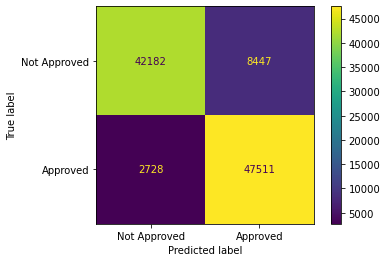

In [16]:
y_pred = model_cb.predict(X_test)
plot_confusion_matrix(model_cb, X_test, Y_test, values_format ='d', display_labels = ['Not Approved','Approved'])

In [13]:
print(accuracy_score(Y_test,y_pred))

0.8399492405916643


In [17]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88     50629
           1       0.85      0.95      0.89     50239

    accuracy                           0.89    100868
   macro avg       0.89      0.89      0.89    100868
weighted avg       0.89      0.89      0.89    100868

